## Aim

- (i) Apply Naive bayes classifier for given data see Naive_bayes_handout.zip file in edmodo.

- (ii) Apply and compare Linear Discriminating Analysis with Naive bayes classifiers w.r.t. error, specificity and sensitivity


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
## Spam email classifier dataset

"""
Dataset Description : 

 the detection of COVID19-related fake news in English. The sources of data are various social-media platforms such as Twitter, 
 Facebook, Instagram, etc. Given a social media post, the objective of the shared task is to classify it into either fake or 
 real news.

"""

df_train = pd.read_csv('../input/covid19-fake-news-dataset-nlp/Constraint_Train.csv', index_col ='id')
df_train.head()

,tweet,label
id,,
1,The CDC currently reports 99031 deaths. In gen...,real
2,States reported 1121 deaths a small rise from ...,real
3,Politically Correct Woman (Almost) Uses Pandem...,fake
4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
5,Populous states can generate large case counts...,real


In [3]:
def encode_y(s):
    if s == 'real':
        return 1
    else:
        return 0

df_train['label'] = df_train['label'].apply(encode_y)
df_train.head()

,tweet,label
id,,
1,The CDC currently reports 99031 deaths. In gen...,1
2,States reported 1121 deaths a small rise from ...,1
3,Politically Correct Woman (Almost) Uses Pandem...,0
4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
5,Populous states can generate large case counts...,1


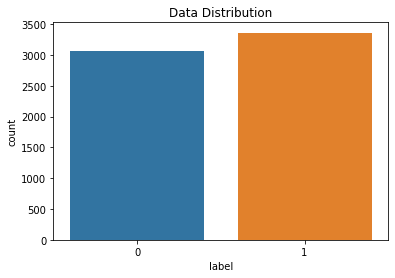

In [4]:
import nltk
sns.countplot(x = "label", data = df_train)
plt.title("Data Distribution");  # Balanced Dataset

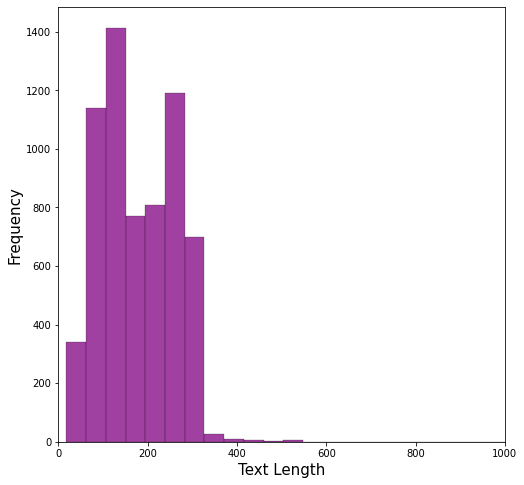

In [5]:
plt.figure(figsize=(8,8))
sns.histplot(df_train['tweet'].apply(len), bins=200, color='purple')
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Text Length", fontsize = 15)
plt.xlim(0,1000)
plt.margins(x = 0);

### Removing punctuation and unnecessary stop words. Using stemmer to get similar results for different forms of the same words

- A **RegexpTokenizer** splits a string into substrings using a regular expression. For example, the following tokenizer forms tokens out of alphabetic sequences, money expressions, and any other non-whitespace sequences
- Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.

- **Stop words** are commonly used in Text Mining and Natural Language Processing (NLP) to eliminate words that are so commonly used that they carry very little useful information.

- **Stemming** is a natural language processing technique that lowers inflection in words to their root forms, hence aiding in the preprocessing of text, words, and documents for text normalization. According to Wikipedia, inflection is the process through which a word is modified to communicate many grammatical categories, including tense, case, voice, aspect, person, number, gender, and mood. Thus, although a word may exist in several inflected forms, having multiple inflected forms inside the same text adds redundancy to the NLP process. As a result, we employ stemming to reduce words to their basic form or stem, which may or may not be a legitimate word in the language. For instance, the stem of these three words, connections, connected, connects, is “connect”. On the other hand, the root of trouble, troubled, and troubles is “troubl,” which is not a recognized word.

In [6]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

stop_words =set(stopwords.words("english"))
stemmer = PorterStemmer()
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import PorterStemmer 

def preprocess(text):
    word_list = []
    tok = tokenizer.tokenize(text)
    for word in tok:
        if word not in stop_words:
            word_list.append(stemmer.stem(word))
    return " ".join(word_list)

In [7]:
x_data = df_train["tweet"].apply(preprocess)
x_data.sample(7)

id
5035    smart citi hospit launch By bihar govern dure ...
2035    coronavirusupd india covid19 recoveri rate imp...
3261    osd maharashtra CM uddhav thackeray break pres...
1791    RT pib_india coronawatch 3853406 total confirm...
6375    the vaccin coronaviru readi US presid donald t...
3490    indiafightscorona 1098621 test conduct last 24...
4298    big end night updat gavinnewsom put new number...
Name: tweet, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(x_data, 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])



http 4398
covid 2158
case 2054
19 1809
test 1695
coronaviru 1661
covid19 1493
new 1198
state 1047
report 1041
death 839
peopl 755
number 701
day 592
hospit 576
total 558
confirm 541
india 519
amp 480
health 425


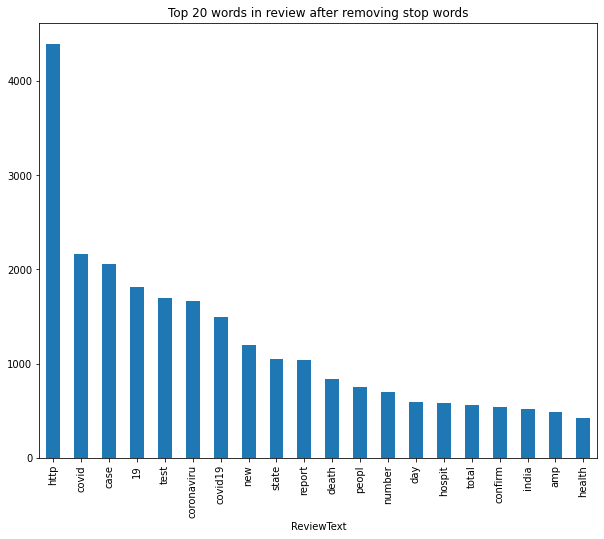

In [9]:
top_words = df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
top_words.plot(kind='bar', title='Top 20 words in review after removing stop words');

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, df_train['label'].values, test_size=0.15, random_state=42)

TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator. vocabulary_ Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [12]:
x_train_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
# sort ascending
df_idf.sort_values(by=['idf_weights'], ascending=False).head()

,idf_weights
iiwgff4hb,8.911691
lou,8.911691
lockdownnow,8.911691
lockdownontario,8.911691
lockdownqueri,8.911691


In [14]:
from numpy import count_nonzero
sparsity = 1.0 - ( x_train_tfidf.count_nonzero() / float(x_train_tfidf.toarray().size) )
print('Sparisity of training data matrix =',sparsity)

Sparisity of training data matrix = 0.9986590434196106


In [15]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_tfidf,y_train)

predictions = naive_bayes.predict(x_test_tfidf)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.893042575285566
Precision score: 0.8802946593001841
Recall score: 0.9263565891472868
F1 score: 0.9027384324834749


In [17]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [18]:
## Secificity: The metric that evaluates a model’s ability to predict true negatives of each available category.

## sensitivity/Recall: The metric that evaluates a model’s ability to predict true positives of each available category.

print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

Specificity: 0.854586129753915
Sensitivity: 0.9263565891472868


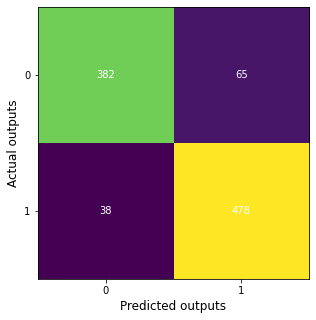

In [19]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [20]:
## Using only Linear Discriminant Analysis Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time
lda = LinearDiscriminantAnalysis()
s = time.time()
lda.fit(x_train_tfidf.toarray(),y_train)
e= time.time()
time_spent = e-s
print(f'Training Time is {time_spent} sec')

Training Time is 95.83070302009583 sec


In [21]:
pred_lda = lda.predict(x_test_tfidf.toarray())

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, pred_lda)))
print('Precision score: {}'.format(precision_score(y_test, pred_lda)))
print('Recall score: {}'.format(recall_score(y_test, pred_lda)))
print('F1 score: {}'.format(f1_score(y_test, pred_lda)))

Accuracy score: 0.6708203530633438
Precision score: 0.6888045540796964
Recall score: 0.7034883720930233
F1 score: 0.6960690316395015


In [22]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, pred_lda).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

Specificity: 0.6331096196868009
Sensitivity: 0.7034883720930233


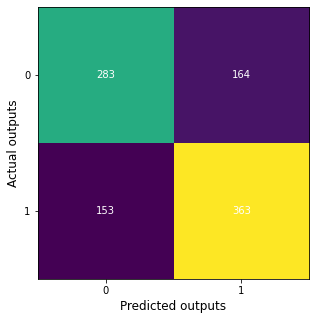

In [23]:
cm = confusion_matrix(y_test, pred_lda)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [24]:
len(df_idf)

13517

Since most of the data is sparse large memory is used with very less information . We reduce the number of features and train both models again.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1000)
x_train_tfidf = vectorizer.fit_transform(X_train)
x_test_tfidf = vectorizer.transform(X_test)

In [31]:
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
# sort ascending
print(len(df_idf))
df_idf.sort_values(by=['idf_weights'], ascending=False).head()

1000


,idf_weights
forecast,7.302253
gt,7.119931
pet,7.039888
israel,7.039888
migrat,6.896788


Accuracy score: 0.8764278296988577
Precision score: 0.8946322067594433
Recall score: 0.872093023255814
F1 score: 0.8832188420019628
Specificity: 0.8814317673378076
Sensitivity: 0.872093023255814


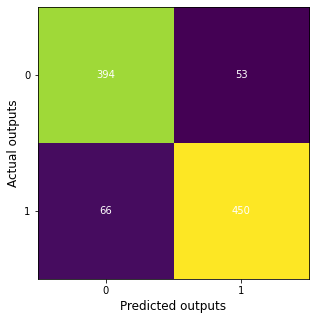

In [32]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_tfidf,y_train)

predictions = naive_bayes.predict(x_test_tfidf)

print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

Training Time is 1.6818478107452393sec
Accuracy score: 0.9055036344755971
Precision score: 0.9158512720156555
Recall score: 0.9069767441860465
F1 score: 0.911392405063291
Specificity: 0.9038031319910514
Sensitivity: 0.9069767441860465


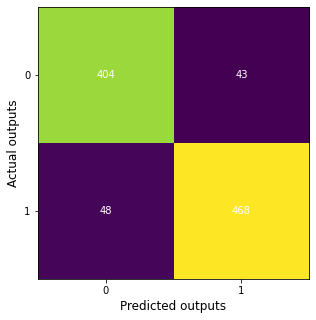

In [33]:
## Using only Linear Discriminant Analysis Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

s = time.time()
lda.fit(x_train_tfidf.toarray(),y_train)
e= time.time()
time_spent = e-s
print(f'Training Time is {time_spent}sec')
pred_lda = lda.predict(x_test_tfidf.toarray())

print('Accuracy score: {}'.format(accuracy_score(y_test, pred_lda)))
print('Precision score: {}'.format(precision_score(y_test, pred_lda)))
print('Recall score: {}'.format(recall_score(y_test, pred_lda)))
print('F1 score: {}'.format(f1_score(y_test, pred_lda)))
tn, fp, fn, tp = confusion_matrix(y_test, pred_lda).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

cm = confusion_matrix(y_test, pred_lda)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [ ]:
"""
Top 4000

NB
Accuracy score: 0.9023883696780893
Precision score: 0.9105058365758755
Recall score: 0.9069767441860465
F1 score: 0.9087378640776699
Specificity: 0.8970917225950783
Sensitivity: 0.9069767441860465

LDA
Training Time is 28.971461057662964sec
Accuracy score: 0.8348909657320872
Precision score: 0.8452611218568665
Recall score: 0.8468992248062015
F1 score: 0.846079380445305
Specificity: 0.8210290827740492
Sensitivity: 0.8468992248062015

Sparisity of training data matrix = 0.9959452538024556


Top 1000

NB 
Accuracy score: 0.8764278296988577
Precision score: 0.8946322067594433
Recall score: 0.872093023255814
F1 score: 0.8832188420019628
Specificity: 0.8814317673378076
Sensitivity: 0.872093023255814

LDA
Training Time is 1.6818478107452393sec
Accuracy score: 0.9055036344755971
Precision score: 0.9158512720156555
Recall score: 0.9069767441860465
F1 score: 0.911392405063291
Specificity: 0.9038031319910514
Sensitivity: 0.9069767441860465
"""

In [34]:
from numpy import count_nonzero
sparsity = 1.0 - ( x_train_tfidf.count_nonzero() / float(x_train_tfidf.toarray().size) )
print('Sparisity of training data matrix =',sparsity)

Sparisity of training data matrix = 0.9868370899761774


## Conclusion
- Naive Bayes and LDA gave an accuracy score of 0.89 and 0.67 by considering the whole set of features. And LDA takes 95secs i.e 1.5 min for training with 13k features. Once the features were reduced to only 4000 accuracy of NB surpassed the total feature accuracy which is 0.90 and LDA accuracy also increased significantly i.e 0.83 and now the training time for LDA is 28secs which is 1/3rd of earlier
- Accuracy of NB dropped from 0.89 to 0.87 but LDA accuracy reached all time high i.e 0.90 which is comparable to NB and also the training time taken is only 1.6 sec. Sparsity of matrix also reduced from 0.99 to 0.98
- hence taking good features is more important than taking all the data